# EE613 - Linear Regression II - Exercise 2 (Tensor Variate Linear Regression)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from regression_methods import TensorRidgeRegression

## Problem Definition

In this exercise, the original problem is defined as 

<h4><center>$$\langle W, x \rangle = y, \quad (1)$$</center></h4>

 
where $x \in \mathbb{R}^{D_1 \times D_2}$, $W \in \mathbb{R}^{D_1 \times D_2}$, $y \in \mathbb{R}$. $\langle \rangle$ denotes the inner product operation, i.e.

$$\langle W, x \rangle = \sum_i \sum_j w_{ij} x_{ij}$$

Given a set of $x$ and $y$, we need to find the value of $W$. 

## Data generation 

First, we select the "true" value of the coefficients $W$, to generate the data. The coefficient W in this problem "happens" (by design) to corresponds to an image.   

<function matplotlib.pyplot.cohere>

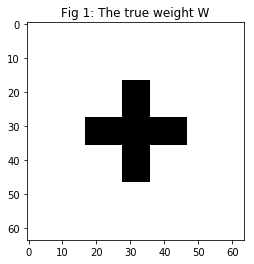

In [2]:
# Select the coefficient (each coefficient corresponds to an image)
image_options = ['dummy_square', 'dummy_circle', 'dummy_triangle','dummy_cross','dummy_tshape','dummy_star']
selected_image = 3 #change this to choose other images
img = mpimg.imread('../python_data/tensor_data/' + image_options[selected_image]) 
W_true = np.copy(img[:, :, 0])
W_true[W_true < 200] = 0
W_true[W_true > 0] = 1

plt.imshow(W_true, cmap='Greys')
plt.title('Fig 1: The true weight W')
plt.cohere

Given the true coefficient $W$, we generate $N$ random pairs of $\{x_n,y_n\}_{n=1}^N = \{X,Y\}$ by generating random $x$ and computing $y$ using equation (1), corrupted by some noise. 

In [3]:
# Parameters
N = 500  # The number of data can be changed
Ndim = 1 # Dimension of the output
noise_level = 0.1  # The noise level can be changed
d1 = W_true.shape[0]
d2 = W_true.shape[1]

#Generate random data
bVec = W_true.flatten()  
X = np.random.randn(N, d1,d2)  # random input
Y = np.sum(bVec*X.reshape(N,d1*d2),axis=1) #equation (1)
noise = noise_level * np.std(Y)
Y += noise * np.random.randn(N)  # add noise to the output
Y = Y[:, None]

<br>

***

### Question 1: 
Given the data $\{X,Y\}$, calculate the coefficient $W$ by the standard Ridge Regression! Plot the obtained $W$ as image, and compare to Fig. 1 above (the true $W$).

(Hint: reformulate the problem in (1) by vectorizing both $x$ and $W$, resulting in a standard linear regression problem)




### Question 2: 
Given the data $\{X,Y\}$, calculate the coefficient W by Tensor Variate Linear Regression! Plot the obtained W as image, and compare to the result obtained in Question 1 (visually).
You can follow the example in demo_tensorRegr.ipynb. 

*** 

## Solution 

#### Ridge Regression 

[]

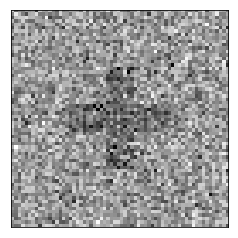

In [4]:
# Ridge regression using numpy
x = X.reshape(N,d1*d2)
W = np.dot(np.linalg.pinv(x,rcond=1e-7),Y)
W = W.reshape(d1,d2)

plt.imshow(W, cmap='Greys')
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])

####  Tensor ridge regression

Tensor Ridge regression...
TRR did not converged after 200 iterations.


[]

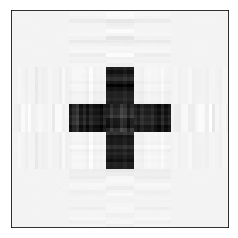

In [6]:
print('Tensor Ridge regression...')
trr_rank = 2  # The rank can be changed
trr = TensorRidgeRegression(trr_rank)

trr.training(X, Y, reg=1e-1)
trr_coeffs = np.reshape(trr.wVec[0], (d1, d2))

#plot the coefficient
plt.imshow(trr_coeffs, cmap='Greys')
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])